In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

def count_cat(table):
    for name in table.columns:
        print(name, end = ": ")
        print(table[name].nunique())
    
table = pd.read_csv("table.csv", sep = ";")
count_cat(table)

EVENT_TIME: 28884
USER_HASH: 7608
EVENT_TYPE: 1
EVENT_TYPE_EX: 4
AMOUNT: 6067
X2: 6465
X3: 29304
X4: 1418
X5: 1781
X6: 786
X9: 246
X10: 160
X11: 6
X12: 5
X13: 519
X14: 196
X15: 550
X16: 78
X17: 891
X18: 72
X22: 28
X23: 8144
X24: 565
X26: 2
COOKIE: 11867
p1_Fraud: 993
p2_Fraud: 697
p3_Fraud: 1495
p4_Fraud: 1071
p5_Fraud: 997
CLASS: 3


In [21]:
#    Критерии:
#    EVENT_TYPE_EX: 4 -
#    AMOUNT: 6067     +
#    X9: 246          +
#    X10: 160         +
#    X11: 6           -
#    X12: 5           -
#    X13: 519         +
#    X14: 196         +
#    X15: 550         +
#    X16: 78          -
#    X17: 891         +
#    X18: 72          +
#    X22: 28          +
#    X24: 565         -
#    X26: 2           -

In [22]:
le = LabelEncoder()
table.replace(np.nan, "nul", inplace=True)
#print(table["EVENT_TYPE_EX"].unique())
#print(table["X11"].unique())
#print(table["X12"].unique())
#print(table["X16"].unique())
#print(table["X24"].unique())
#print(table["X26"].unique())

le.fit(table.EVENT_TYPE_EX)
table["EVENT_TYPE_EX"] = le.transform(table.EVENT_TYPE_EX)
le.fit(table.X11)
table["X11"] = le.transform(table.X11)
le.fit(table.X12)
table["X12"] = le.transform(table.X12)
le.fit(table.X16)
table["X16"] = le.transform(table.X16)
le.fit(table.X24)
table["X24"] = le.transform(table.X24)
le.fit(table.X26)
table["X26"] = le.transform(table.X26)

[0 2 3 1]
[3 0 4 1 2 5 6]
[1 0 2 4 3]
[31 32 63 67 30 29 27 37 68 28 16 75 26 17 35 71 25 38 24 22 23 19 66  7
 33 74 15 58 51 76 77 34 12 52 36 49 14 45 21 50  9 65 64 61 47 18  6  2
  4 57  1 62 48 20 53 43 54  8 72 55 60 59 70  5 73 46  0 40 42 13 10 56
 78 44  3 41 39 69 11]
[363  28 306 287 525 499 144 253 331 216 405 565  62 564  84 320 484 528
 155 102  70 181 409 485 465 414 359 533 505   7 534 275 547 160  48 324
 457 145 168 225  58  40 381 212 545 531 400 493 364 345  71 293 150 459
 228 259 340  26 443 318 184  69 316 395 257  41 307 488 392 170 526 530
 111 103  19 209 423 537 175 186 215 453  67 446 483 243 492 326 112 206
 501 399 169 245 463 269 456 542 250  31 557 544 427 177 101 310 152 280
  94 355 474  34 157  33 265 541 182 166   0 106 325 375 113 495 515 524
 532 202  16  42  21 279 341  79 344 362 138 550  60 397   4 552  38 130
 143  52 348 368 497 424 439 321 167 371 500 394  30 559 470 211 378 172
 305 151 350 126 263 128 380 239 174 258 413 248 444  82 319 32

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def graph(i,j):
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for k in range(len(table["CLASS"])):
        if table["CLASS"][k]!="F":
            x1.append(table[i][k])
            y1.append(table[j][k])
        else:
            x2.append(table[i][k])
            y2.append(table[j][k])
    plt.plot(x2, y2, "ro", alpha = 0.9)              #red - Fraud
    plt.plot(x1, y1, "gs", alpha = 0.3)              #green - Legit
    plt.title(i+", "+j)
    plt.grid()

props = ["X9", "X10", "X11", "X12", "X13", "X14", "X15", "X16", "X17", "X18", "X22", "X23", "X24", "X26"]
lenp = len(props)

ax = []

c=0
f = plt.figure(figsize=(7,8*lenp*(lenp-1)))
for p1 in range(lenp):
    for p2 in range(p1+1,lenp):
        c+=1
        ax = f.add_subplot(lenp*lenp,1,c)
        graph(props[p1],props[p2])            

plt.show()

KeyboardInterrupt: 

In [4]:
def falsepos(rule,percent):
    c1=c2=0
    for i in range(len(table[rule])):
        if (table["CLASS"][i]=="G"):
            c1+=1
            if (table[rule][i]>=percent):
                c2+=1
    print("fp: "+str(c2/c1))

def falseneg(rule,percent):
    c1=c2=0
    for i in range(len(table[rule])):
        if (table["CLASS"][i]!="G"):
            c1+=1
            if (table[rule][i]<=percent):
                c2+=1
    print("fn: "+str(c2/c1))

def recall(rule,percent):
    fsfr=fslr=lsfr=0
    q=len(table[rule])
    for i in range(q):
        if (table[rule][i]>=percent):
            if (table["CLASS"][i]!="G"):
                fsfr+=1
            else:
                fslr+=1
        else:
            if (table["CLASS"][i]!="G"):
                lsfr+=1
    print("recall: "+str(fsfr/(fsfr+q*lsfr)))
    print("precicion: "+str(fsfr/(fsfr+q*fslr)))

for p in range(1,6):
    rule="p"+str(p)+"_Fraud"
    print(rule+":")
    falsepos(rule,0.5)
    falseneg(rule,0.5)
    recall(rule,0.5)
    
#fp<=0.2 if:
#r1=0.69
#r2=0.79
#r3=0.54
#r4=0.53
#r5=0.99

p1_Fraud:
fp: 0.39233423969880776
fn: 0.699901768172888
recall: 1.4727631459551035e-05
precicion: 1.3958185778049537e-05
p2_Fraud:
fp: 0.42851913825559507
fn: 0.2738703339882122
recall: 9.136981298182105e-05
precicion: 3.0863568818254935e-05
p3_Fraud:
fp: 0.31525831416021755
fn: 0.15471512770137524
recall: 0.00018696848550509932
precicion: 4.872584242603643e-05
p4_Fraud:
fp: 0.34417485881614723
fn: 0.43339882121807466
recall: 4.4772086249560754e-05
precicion: 2.9950534439731754e-05
p5_Fraud:
fp: 0.5268249320225894
fn: 0.1319253438113949
recall: 0.000225654137354446
precicion: 2.995122962329499e-05


0.0751435858382572
0.18019930148268126
0.39273492278822086


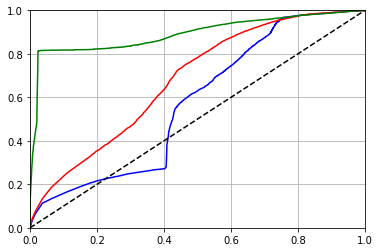

In [5]:
from sklearn.metrics import roc_curve, auc
import numpy as np

y = np.array(table["CLASS"])
x1 = np.array(table["p1_Fraud"])
x2 = np.array(table["p2_Fraud"])
x3 = np.array(table["p3_Fraud"])
fpr, tpr, thresholds = roc_curve(y,x1,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'b')
fpr, tpr, thresholds = roc_curve(y,x2,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'r')
fpr, tpr, thresholds = roc_curve(y,x3,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'g')
plt.plot([0,1], [0,1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.show()

0.3661970040164524


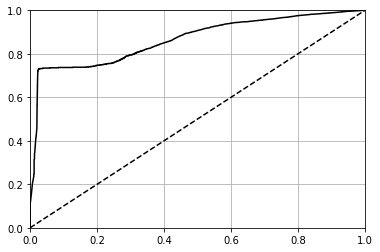

In [6]:
y = np.array(table["CLASS"])
a=1
b=1
c=10
x4 = (a*x1+b*x2+c*x3)/(a+b+c)
fpr, tpr, thresholds = roc_curve(y,x4,pos_label="F")
roc_auc = auc(fpr,tpr)
print(roc_auc-0.5)
plt.plot(fpr, tpr, 'k')
plt.plot([0,1], [0,1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.show()